<img src="files/Northwind_ERD_updated.png">

**Research question 1:** Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

In [3]:
import pandas as pd
import sqlite3

conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

In [5]:
cur.execute("""SELECT * from OrderDetail""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]

print(len(df))
df.head()

2155


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [6]:
df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [7]:
df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [16]:
discounts = set(df.Discount.values)
discounts

{0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25}

In [20]:
import numpy as np

avg_order_size = []
for d in discounts:
    mu = df[df['Discount'] == d]['Quantity'].mean()
    avg_order_size.append(mu)
    
avg_order_size

[21.715261958997722,
 28.24025974025974,
 27.024844720496894,
 28.01081081081081,
 28.38216560509554,
 25.23699421965318,
 1.6666666666666667,
 2.0,
 2.0,
 1.0,
 2.0]

In [26]:
discount_order_size = {}

for d in discounts: 
    discount_order_size[d] = df[df['Discount'] == d]['Quantity'].mean()
    
discount_order_size

{0.0: 21.715261958997722,
 0.25: 28.24025974025974,
 0.2: 27.024844720496894,
 0.05: 28.01081081081081,
 0.15: 28.38216560509554,
 0.1: 25.23699421965318,
 0.03: 1.6666666666666667,
 0.06: 2.0,
 0.01: 2.0,
 0.04: 1.0,
 0.02: 2.0}

In [9]:
df.ProductId.nunique()

77

In [10]:
df.OrderId.nunique()

830

In [12]:
len(df.OrderId)

2155

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
no_d = np.array(df[df['Discount'] == 0.0]['Quantity'])
d = np.array(df[df['Discount'] > 0.0]['Quantity'])

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


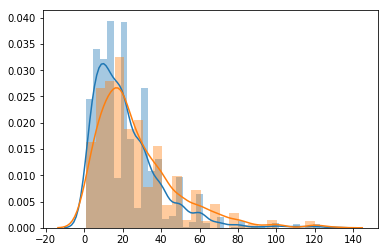

In [34]:
sns.distplot(no_d)
sns.distplot(d)

In [35]:
import scipy.stats as stats

In [42]:
stats.ttest_ind(no_d, d, axis=0, equal_var=False)[1]

5.65641429030433e-10

In [43]:
np.std(no_d)

17.500845477669806

In [44]:
np.std(d)

20.759042075141373

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB
